<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
        
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Gustavo Adrián Herrera Barragán, Luis Jorge Ahumada Cerda & Santiago Cataño Besson

**Fecha:** 30 de marzo del 2023.

**Expedientes** : 734546, XXXXXX & XXXXXX
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/adrianhb01/Proyecto_Tema_2_Equipo_8.git

# Proyecto TEMA-2

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# Proyecto Módulo 2- Guía.
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que utilice datos reales, ya sea de una empresa física real o de alguna página de internet que proporcione bases de datos confiables. Con la información obtenida, se pretende utilizar todas las herramientas vistas durante el curso para la correcta modelación y simulación del cierto problema con ciertas variables de interés.

### Diagrama:

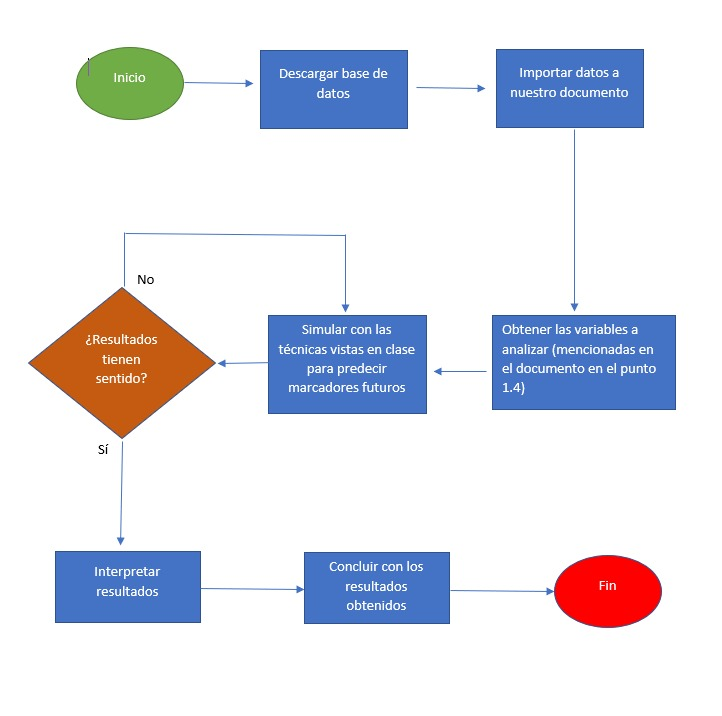

In [4]:
Image(filename = "Diagrama .jpeg")

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.


### 1.1 "Predicción de marcadores en partidos de fútbol".


### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - El objetivo general de este proyecto es desarrollar un modelo capaz de predecir el resultado de un partido de fútbol, basado en datos históricos y actuales del equipo.
> #### 1.2 Objetivos específicos
>  - Recopilar y limpiar los datos necesarios para el modelo.
>  - Realizar un análisis exploratorio de los datos para identificar patrones y tendencias.
>  - Identificar las variables más importantes para predecir el resultado de un partido.
>  - Evaluar el rendimiento del modelo utilizando diferentes métricas de evaluación.
>  - Implementar el modelo en una aplicación web para permitir a los usuarios predecir el resultado de los partidos.

### 1.3 Definición del problema.
> 
El escenario de negocio que se va a modelar es el de un sitio web de apuestas deportivas en línea, el cual ofrece a los usuarios la posibilidad de realizar apuestas en partidos de fútbol. El objetivo de este proyecto es desarrollar un modelo de aprendizaje automático que permita predecir el resultado de los partidos y, de esta manera, mejorar la precisión de las apuestas.



### 1.4 Nodos y variables que se decidieron simular y porqué
> Nodos a simular:

> Nodos o escenarios a simular:

* 1. estimacion de goles de un equipo 
* 2. prediccion de formaciones en los equipos
* 3. simulacion de resultados de campeonatos
* 4. prediccion de goles por jugador

### 1.5 Definición de hipótesis y supuestos.
>  Hipótesis:

* El rendimiento de un equipo en los partidos anteriores es un buen predictor de su rendimiento en el partido actual.

* Los factores externos, como las condiciones climáticas, tienen un impacto limitado en el resultado del partido.

* La posición en la tabla de posiciones de un equipo es un buen indicador de su capacidad para ganar el partido.

> supuestos:
* Los datos históricos y actuales del equipo son precisos y fiables.
* Los equipos mantienen una consistencia en su desempeño durante la temporada.
* Los jugadores clave de los equipos están disponibles para jugar en el partido.



### 1.6 Obtención de bases de datos
> El tercer paso del proyecto es indicar de dónde se obtendrán las bases de datos, que indican como se han comportado las variables que identificaste en tu proceso de negocio que vas a simular. En esta investigación debes haber encontrado información propia de la empresa, organización o institución que vas a simular y otra parte de la información debe provenir de investigación que realices en fuentes de información públicas o privadas como las que tiene SECOBI, ahí normalmente y dependiendo del problema elegido, se investigan variables económicas, como tasas de interés, inflación, tipo de cambio, etc., de varios años, por poner un ejemplo.

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

#preguntas 
cuales son los datos que mas nos pueden funcionar a acercarnos a acertar?
tenemos que ser todavia mas especificos o se puede generalizar hacia el partido que sea?
cuales pasos son primero y cuales van despues, como ajusto los de la clase aqui, para lograr una modelacion correcta 
los modelos vistos funcionan solo para 1 variable o como es que se adaptan a un conjunto?

In [35]:
# librerias 
import numpy as np
import scipy.stats as st     # Librería estadística
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")
from functools import reduce
import time
from scipy import optimize
import seaborn as sns

In [53]:
#importacion de datos
df_premiere_table = pd.read_csv('European Football Season 2022:23/table_premier-league_2022-23.csv').dropna()
df_premiere_matches = pd.read_csv('European Football Season 2022:23/matches_premier-league_2022-23.csv').dropna()
df_player_stats = pd.read_csv('2022-2023 Football Player Stats.csv')
df_premiere_matches

FileNotFoundError: [Errno 2] No such file or directory: '2022-2023 Football Player Stats.csv'

In [37]:
## Función para graficar histogramas
def subplot_dist(lis: 'Insertar la lista con los datos',titu: 'Insertar lista de títulos'):   
    fig, ax = plt.subplots(1, len(lis), sharey=True, figsize=(20, 6))
    fig.subplots_adjust(wspace=.1)
    [ax[i].hist(lis[i]) for i in range(len(lis))]
    [ax[i].set_title(titu[i]) for i in range(len(titu))]

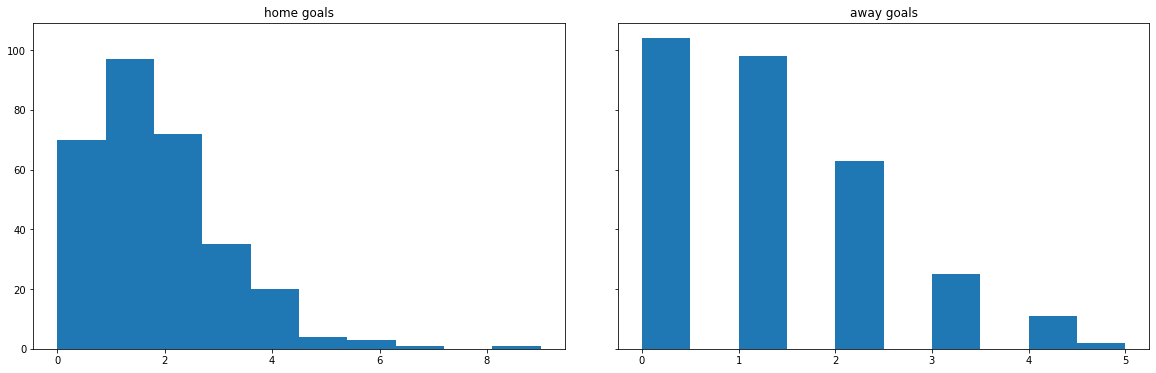

In [41]:
lista_co = [df_premiere_matches['team_home_score'].values, df_premiere_matches['team_away_score'].values ]
titulos_co = ['home goals','away goals']
subplot_dist(lista_co,titulos_co)

In [46]:
#GRIDS 

#Home goals
grid_hg = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 4.4, 50)},
                    cv=20)
grid_hg.fit(lista_co[0][:, None])
x_grid_hg = np.linspace(0, 4.4, 1000)
kde_hg = grid_hg.best_estimator_
pdf_hg = np.exp(kde_hg.score_samples(x_grid_hg[:, None])) #Kernel

#away goals
grid_ag = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 4.4, 50)},
                    cv=20)
grid_ag.fit(lista_co[1][:, None])
x_grid_ag = np.linspace(0, 4.4, 1000)
kde_ag = grid_ag.best_estimator_
pdf_ag = np.exp(kde_ag.score_samples(x_grid_ag[:, None])) #Kernel



In [47]:
## Función para graficar el kernel
def trans_a_kernel(x_grid,pdf,kde,datos,titulo):
    
    plt.figure()
    plt.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
    plt.hist(datos, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True) 
    plt.legend(loc='upper left')
    plt.title(titulo)
    plt.show()

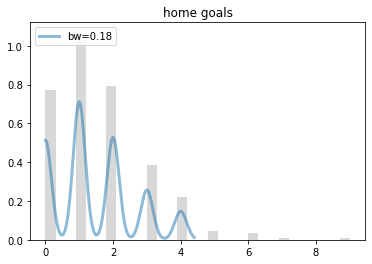

In [48]:
trans_a_kernel(x_grid_hg,pdf_hg,kde_hg,lista_co[0],titulos_co[0])


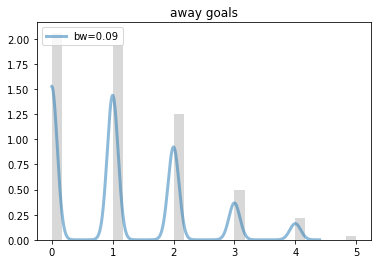

In [51]:
trans_a_kernel(x_grid_ag,pdf_ag,kde_ag,lista_co[1],titulos_co[1])


In [52]:
lista_temp = [aguilas['Temp Ext'].values,centro['Temp Ext'].values, tlaquepaque['Temp Ext'].values, vallarta['Temp Ext'].values]
titulos_temp = ['Temperatura aguilas','Temperatura centro', 'Temperatura tlaquepaque ', 'Tlaquepaque vallarta']
subplot_dist(lista_temp,titulos_temp)

,competition_id,competition_code,name,type,sub_type,country_id,country_name,country_latitude,country_longitude,domestic_league_code,confederation,url
0,L1,bundesliga,Bundesliga,domestic_league,first_tier,40,Germany,51.163818,10.447831,L1,europa,https://www.transfermarkt.co.uk/bundesliga/sta...
1,DFB,dfb-pokal,Dfb Pokal,domestic_cup,domestic_cup,40,Germany,51.163818,10.447831,L1,europa,https://www.transfermarkt.co.uk/dfb-pokal/star...
2,DFL,dfl-supercup,Dfl Supercup,other,domestic_super_cup,40,Germany,51.163818,10.447831,L1,europa,https://www.transfermarkt.co.uk/dfl-supercup/s...
3,NL1,eredivisie,Eredivisie,domestic_league,first_tier,122,Netherlands,52.243498,5.634323,NL1,europa,https://www.transfermarkt.co.uk/eredivisie/sta...
4,NLP,toto-knvb-beker,Toto Knvb Beker,domestic_cup,domestic_cup,122,Netherlands,52.243498,5.634323,NL1,europa,https://www.transfermarkt.co.uk/toto-knvb-beke...


In [12]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    v = {i: val for i, val in enumerate(indices)}
    # Series de los valores aletorios generados
    resultado = pd.Series([sum([1 for i in p_acum if i<ui]) for ui in u]).map(v)

    return resultado

In [13]:
N = 10**4
v = Gen_distr_discreta(p_acum, val, N)

# Método 1 (Correcto)
y, bins = np.histogram(v, bins=len(set(val)))
plt.bar(val, y)
plt.title('METODO CORRECTO')
plt.xlabel('valores (índices)')
plt.ylabel('frecuencias')
plt.show()
 

NameError: name 'p_acum' is not defined

In [15]:
#importacion de datos
df3 = pd.read_csv('International football results from 1872 to 2022/results.csv')
df3

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False


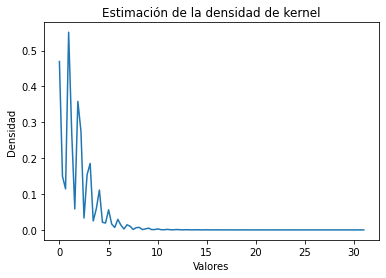

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generar datos de ejemplo
datos = df3['home_score']
# Calcular la densidad de kernel
densidad = gaussian_kde(datos)

# Generar una serie de valores para evaluar la densidad de kernel
x = np.linspace(datos.min(), datos.max(), 100)

# Calcular los valores de la densidad de kernel en cada punto de x
y = densidad(x)

# Graficar la densidad de kernel
plt.plot(x, y)
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Estimación de la densidad de kernel")
plt.show()


In [18]:
from scipy.stats import ttest_ind

# Generar dos conjuntos 
datos1 = df3['home_score']
datos2 = df3['away_score']

# Realizar una prueba t de dos muestras para determinar si las medias son significativamente diferentes
resultado, p_valor = ttest_ind(datos1, datos2)

# Imprimir el resultado de la prueba
print("Resultado de la prueba t: ", resultado)
print("Valor p: ", p_valor)


Resultado de la prueba t:  52.97056869668177
Valor p:  0.0


In [19]:
import numpy as np

# Generar datos de ejemplo
datos = df3['away_score']

# Muestreo de importancia
pesos = np.abs(datos) / np.sum(np.abs(datos))
muestra_importancia = np.random.choice(datos, size=100, p=pesos)

# Muestreo estratificado
muestra_estratificada = []
for i in range(10):
    subconjunto = datos[i*100:(i+1)*100]
    muestra_estratificada.append(np.random.choice(subconjunto, size=10))

muestra_estratificada = np.concatenate(muestra_estratificada)


In [20]:
import random

# Generar números pseudoaleatorios
aleatorio = random.random()
entero_aleatorio = random.randint(0, 10)

# Generar muestras aleatorias de una distribución uniforme
muestras_uniforme = np.random.uniform(low=0, high=1, size=1000)

# Generar muestras aleatorias de una distribución normal
muestras_normal = np.random.normal(loc=0, scale=1, size=1000)


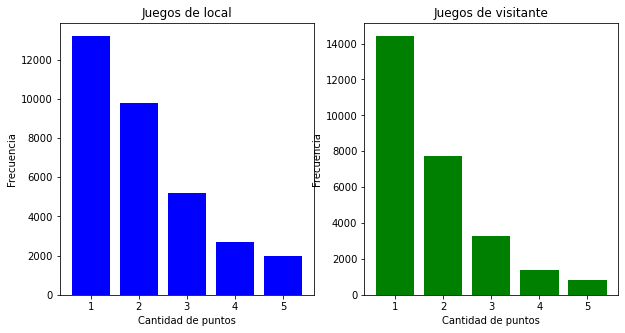

In [31]:
import matplotlib.pyplot as plt

# Generar datos de ejemplo
home = df3['home_score']
away = df3['away_score']

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Graficar el histograma de los juegos de local en el primer subgráfico
axs[0].hist(home, bins=range(1, 7), align='left', rwidth=0.8, color='blue')
axs[0].set_xlabel('Cantidad de puntos')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Juegos de local')

# Graficar el histograma de los juegos de visitante en el segundo subgráfico
axs[1].hist(away, bins=range(1, 7), align='left', rwidth=0.8, color='green')
axs[1].set_xlabel('Cantidad de puntos')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Juegos de visitante')

# Mostrar la figura
plt.show()


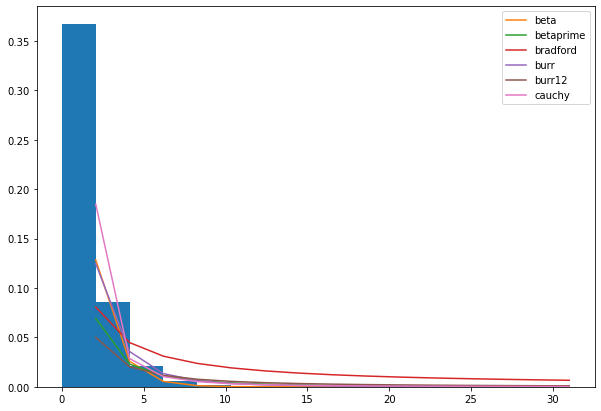

,distribución,error
0,beta,0.00405
1,betaprime,0.00617
2,bradford,0.005685
3,burr,0.004081
4,burr12,0.006982
5,cauchy,0.002435


In [28]:
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(df3['home_score'], bins = 15, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(df3['home_score'])
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

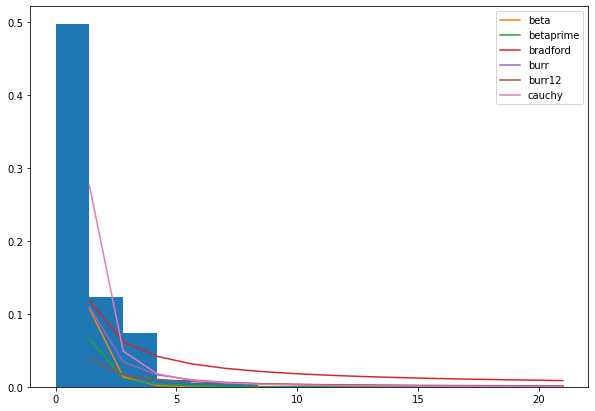

,distribución,error
0,beta,0.011305
1,betaprime,0.013587
2,bradford,0.010084
3,burr,0.010793
4,burr12,0.01508
5,cauchy,0.003834


In [29]:
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(df3['away_score'], bins = 15, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(df3['away_score'])
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


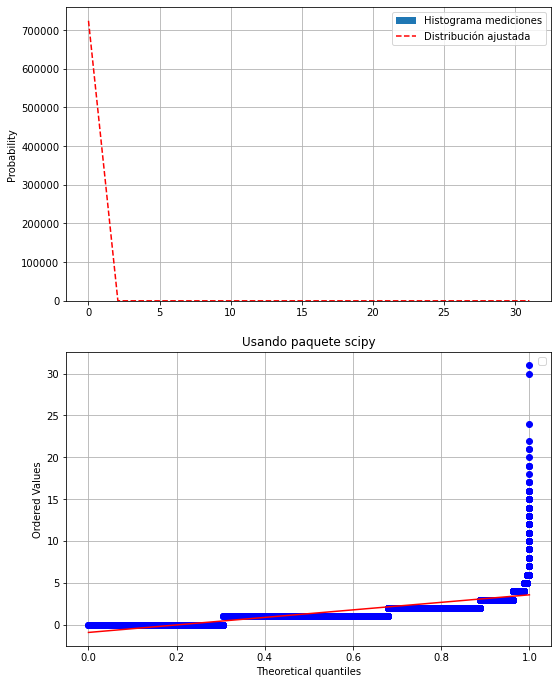

In [33]:
divisiones = 15
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(home, divisiones, density=True, label='Histograma mediciones')

dist = 'beta'
params = getattr(st, dist).fit(home)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(home, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>